In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from nltk.tokenize import PunktSentenceTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE
from sklearn import metrics
%matplotlib inline

In [4]:
text = pd.read_csv('textdf.csv', names = ['Text'])

In [5]:
text.head()

,Text
0,I have a Sony surround sound system for a blu-...
1,I've written what seems to be a prohibitively ...
2,"I'm writing an article called ""Video Games Tha..."
3,[deleted]
4,I have the following representation of argumen...


In [6]:
tfidf = TfidfVectorizer(stop_words='english')

In [7]:
tfidf_vectorized = tfidf.fit_transform(text['Text'])

In [8]:
tfidf_vectorized.shape

(24594, 61315)

In [9]:
tsvd = TruncatedSVD()

In [10]:
tsvd_transformed = tsvd.fit_transform(tfidf_vectorized)

In [11]:
tsvd.explained_variance_ratio_.sum()

0.23602493135654198

In [12]:
tsvd10 = TruncatedSVD(n_components= 10)

In [13]:
tsvd10_transformed = tsvd10.fit_transform(tfidf_vectorized)

In [14]:
tsvd10.explained_variance_ratio_.sum()

0.26589993575848103

In [15]:
tsvd50 = TruncatedSVD(n_components=50)

In [16]:
tsvd50_transformed = tsvd50.fit_transform(tfidf_vectorized)

In [17]:
tsvd50.explained_variance_ratio_.sum()

0.31699141000387021

In [18]:
ac = AgglomerativeClustering(n_clusters=2)

In [19]:
labels = ac.fit_predict(tsvd50_transformed)

In [20]:
tsne = TSNE()

In [21]:
tsne50 = tsne.fit_transform(tsvd50_transformed)

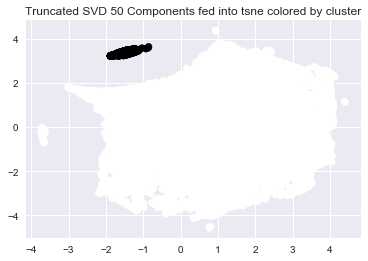

In [22]:
plt.scatter(tsne50[:,0], tsne50[:,1], c = labels)
plt.title('Truncated SVD 50 Components fed into tsne colored by cluster')

In [30]:
labels[8:13]

array([1, 0, 0, 0, 1])

In [27]:
text.iloc[8]

Text    [removed]
Name: 8, dtype: object

In [28]:
text.iloc[9]

Text    As the title says. Yesterday I've finally had ...
Name: 9, dtype: object

In [32]:
text.iloc[12]

Text    [removed]
Name: 14, dtype: object

**Looks like from 2 clusters we were able to group up the [removed] posts with all the other posts**

In [33]:
ac3 = AgglomerativeClustering(n_clusters=3)

In [34]:
labels3 = ac3.fit_predict(tsvd50_transformed)

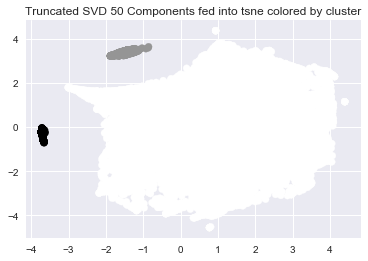

In [36]:
plt.scatter(tsne50[:,0], tsne50[:,1], c = labels3)
plt.title('Truncated SVD 50 Components fed into tsne colored by cluster')

In [39]:
labels3[5:10]

array([0, 2, 0, 1, 0])

In [40]:
text.iloc[5]

Text    I am about to create a website where users use...
Name: 5, dtype: object

In [41]:
text.iloc[6]

Text    [deleted]
Name: 6, dtype: object

In [42]:
text.iloc[7]

Text    This [post](https://www.reddit.com/r/learnpyth...
Name: 7, dtype: object

In [43]:
text.iloc[8]

Text    [removed]
Name: 8, dtype: object

**3 clusters divide posts into [deleted],[removed],and everything else**

In [44]:
ac4 = AgglomerativeClustering(n_clusters=4)

In [45]:
labels4 = ac4.fit_predict(tsvd50_transformed)

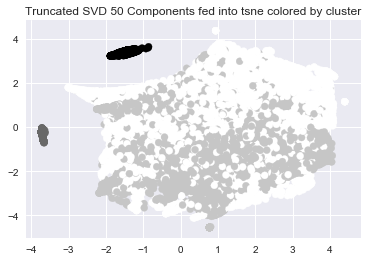

In [46]:
plt.scatter(tsne50[:,0], tsne50[:,1], c = labels4)
plt.title('Truncated SVD 50 Components fed into tsne colored by cluster')

In [48]:
labels4[6:10]

array([2, 0, 3, 1])

In [49]:
text.iloc[6]

Text    [deleted]
Name: 6, dtype: object

In [50]:
text.iloc[7]

Text    This [post](https://www.reddit.com/r/learnpyth...
Name: 7, dtype: object

In [51]:
text.iloc[8]

Text    [removed]
Name: 8, dtype: object

In [52]:
text.iloc[9]

Text    As the title says. Yesterday I've finally had ...
Name: 9, dtype: object

**Lets compare 7 and 9**

In [53]:
text['Text'][7]

'This [post](https://www.reddit.com/r/learnpython/comments/5fi5sq/every_possible_4_digit_number_that_has_no/) is a great example. It shows a great start and the top post has great explanation and its a lot more efficient. \n\nAre there blogs or sites which show python code in this format?'

In [54]:
text['Text'][9]

'As the title says. Yesterday I\'ve finally had a few days off and managed to finally mount my parts that arrived on tuesday, two http://www.lg.com/hk_en/monitor/lg-23MP68VQ-P and 6700k + MSI Z170A M5 + 2x 8 GB kingston hyperx @ 2400 mhz. So I tried a lot of combinations, switched every single thing in BIOS, primary graphic device is set to PEG but no matter the settings if a display is connected via HDMI then my r9 380 takes it as a priority so even displaying it on a device connected via DVI is possibly not going to work, VGA already does not. During the boot the display just says "HDMI Out of range", then it blinks black and then again the same message until Windows pops up. After a few hours of switching between IGD, IGD Multi-monitor and restoring defaults in MSI\'s BIOS I just turned freesync off during the boot on the display and the issue disappeared. Note that I\'m running 75 hz. This is somewhat weird awkward because last night I switched from M5A97 R2 and FX-6300 and that wa

**Hard to say what is the difference. Length? Phrased as question? External links? Lots of numbers?**

In [139]:
df1 = pd.read_csv('df1.csv')

In [140]:
df1.drop('Unnamed: 0', axis = 1, inplace = True)

In [141]:
lb4 = pd.DataFrame(labels4, columns = ['Clusters'])

In [142]:
df1 = pd.concat([df1,lb4], axis = 1)

In [143]:
df1.loc[df1['Clusters'] == 0, 'num_comments'].describe()

count    11077.000000
mean         8.715537
std         66.462266
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max       6109.000000
Name: num_comments, dtype: float64

In [144]:
df1.loc[df1['Clusters'] == 1, 'num_comments'].describe()

count    7131.000000
mean        4.112467
std         7.926201
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       337.000000
Name: num_comments, dtype: float64

In [145]:
df1.loc[df1['Clusters'] == 0, 'score'].describe()

count    11077.000000
mean        12.246818
std        267.202945
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      26573.000000
Name: score, dtype: float64

In [146]:
df1.loc[df1['Clusters'] == 1, 'score'].describe()

count    7131.000000
mean        2.113729
std        13.835209
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       716.000000
Name: score, dtype: float64

**In general, the two text clusters separate popular and unpopular posts**

In [55]:
ac5 = AgglomerativeClustering(n_clusters=5)

In [56]:
labels5 = ac5.fit_predict(tsvd50_transformed)

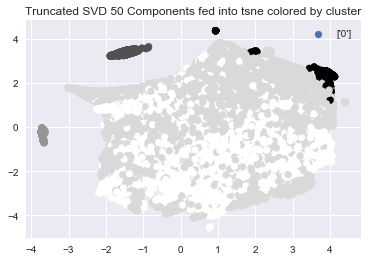

In [90]:
plt.scatter(tsne50[:,0], tsne50[:,1], c = labels5, label = ['0'])
plt.title('Truncated SVD 50 Components fed into tsne colored by cluster')
plt.legend()

In [76]:
labels5[367:375]

array([0, 4, 2, 1, 3, 0, 0, 1])

In [77]:
text['Text'].iloc[367]

'I have a Nixeus Moda v2 mechanical keyboard and often when I touch it there is a static shock that shorts out the keyboard for a moment. Usually it comes back, though one time it busted a keyboard and I had to have it replaced.\n\nIs there anything I can do to avoid this short of hitting metal before my PC every time, as I will often forget to do that? Maybe a mat I can put under my keyboard (it is currently on a wood and glass table) or something else to avoid the static?'

**Cluster 0**

In [78]:
text['Text'].iloc[368]

'When an iMessage app runs in the Messages app, its bounds get set automatically by the Messages app. However, this stops working when the user enables the Subject Field in Settings \xe2\x86\x92 Messages \xe2\x86\x92 Show Subject Field (tested on iOS 10.0.2 &amp; 10.1.1). Somehow Apple seems to have messed up the NSLayoutConstraints of the Messages app because the console output reads:  \n\n&gt; 2016-12-03 01:35:05.424120 MobileSMS[2693:763891] [LayoutConstraints] Unable to simultaneously satisfy constraints.  \n&gt; Probably at least one of the constraints in the following list is one you don\'t want.  \n&gt; Try this: \xe2\x80\xa6\n&gt; (\n&gt;  "&lt;NSAutoresizingMaskLayoutConstraint:0x170291a30 h=-&amp;- v=--&amp; CKMessageEntryView:0x137e49870.midX == UIInputSetHostView:0x137d2e760.midX + 187.5   (active)&gt;",\n&gt;  "&lt;NSAutoresizingMaskLayoutConstraint:0x170291a80 h=-&amp;- v=--&amp; CKMessageEntryView:0x137e49870.width == UIInputSetHostView:0x137d2e760.width + 375   (active)

**Cluster 4**

In [79]:
text['Text'].iloc[369]

'[deleted]'

**Cluster 2**

In [80]:
text['Text'].iloc[370]

"My boyfriend is graduating with a B.S. in Engineering this year. I want to get him something that he will use in his career or is just interesting/funny. I'm also broke so suggestions for something that I could make instead of buy would be awesome!"

**Cluster 1**

In [81]:
text['Text'].iloc[371]

'[removed]'

**Cluster 3**

**Firstly, [removed] and [deleted] are two groups. So we don't need to analyze clusters 2 and 3.**

In [82]:
text['Text'].iloc[372]

"Hello, I have been experiencing computer reboots with a few games. Battlerite, Tyranny, and divinity original sin 2. all these games are run with the Unity engine I believe. It's always in the load screens, towards the end of the load screens when its finishing up that my computer will reboot. Somehow battlerite stopped crashing my pc when I increased the tdrdelay in the regedit, but that didn't help with the other games.\n\n\nI don't get any BSOD even though I turned off the 'restart on system failure' advanced settings. I do get a memory dump, but it's only one each time, but I am able to view it with bluescreen viewer. I can replicate the crash with 100% consistency, all I have to do is load up tyranny and go into a specific room. The load screen going into that specific room in the game causes a reboot. Divinity 2 will reboot on the startup load screen, sometimes it makes it through , but it will reboot on the 2nd or 3rd load screen (before and/or after character creation).\n\n\nI

In [83]:
text['Text'].iloc[373]

"I have an ASUS Z170AR motherboard a i7 6700k and loading BIOS the defaults sets cores 1 and 2 to 4.3ghz and cores 3 and 4 to 4.1ghz. Normally this wouldn't be that big of an issue but this things auto voltage is off the wall regularly pulling 1.4v - any idea on why the defaults are so ambitious? Every motherboards BIOS default settings I have worked with prior don't have OC as the default. Any idea of what voltage I should run if I just wanna keep it stable with ideal temperatures at stock 4.0? So far I have set each core back to 4.0 and the voltage at 1.25"

**One similarity with cluster 0 is that all of them have the phrase 'I have...'**

In [84]:
text['Text'].iloc[374]

'Hey guys,\n\nI just made a new video that teaches you how to use state of the art Deep Learning in Python to make an amazing chatbot! Hope you like it \n\nhttps://www.youtube.com/watch?v=SJDEOWLHYVo'

**Looks like cluster 1 has something to do with short statements and exclamation marks?**

**To examine the clusters more closely, we will add the labels to the original dateframe**

In [91]:
df = pd.read_csv('df1.csv')

In [93]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [101]:
lb = pd.DataFrame(labels5, columns = ['Clusters'])

In [103]:
df = pd.concat([df,lb], axis = 1)

In [104]:
df.loc[(df['Clusters'] == 1), 'num_comments'].describe()

count    10814.000000
mean         8.759571
std         67.220674
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max       6109.000000
Name: num_comments, dtype: float64

In [105]:
df.loc[(df['Clusters'] == 1), 'score'].describe()

count    10814.000000
mean        12.416867
std        270.409586
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      26573.000000
Name: score, dtype: float64

**The averages of these features are higher in cluster 1 when compared to the entire dataset**

In [149]:
df.loc[df['Clusters'] == 1, 'subreddit'].value_counts().head()

techsupport         2711
learnprogramming    2538
learnpython         1359
gamedev              787
web_design           425
Name: subreddit, dtype: int64

**More learning orientated subreddits?**

In [110]:
df.loc[(df['Clusters'] == 0), 'num_comments'].describe()

count    7131.000000
mean        4.112467
std         7.926201
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       337.000000
Name: num_comments, dtype: float64

In [111]:
df.loc[(df['Clusters'] == 0), 'score'].describe()

count    7131.000000
mean        2.113729
std        13.835209
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       716.000000
Name: score, dtype: float64

In [112]:
df.loc[df['Clusters'] == 0, 'subreddit'].value_counts().head()

techsupport         6828
learnprogramming      97
linux                 48
computerscience       34
learnpython           30
Name: subreddit, dtype: int64

**Cluster 0 has lower scores and comments than cluster 1, and is more tech support related**

In [113]:
df.loc[(df['Clusters'] == 4), 'num_comments'].describe()

count    263.000000
mean       6.904943
std       15.697598
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max      223.000000
Name: num_comments, dtype: float64

In [114]:
df.loc[(df['Clusters'] == 4), 'score'].describe()

count    263.000000
mean       5.254753
std       21.709914
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      319.000000
Name: score, dtype: float64

In [150]:
df.loc[df['Clusters'] == 4, 'subreddit'].value_counts().head()

learnprogramming    75
learnpython         36
techsupport         30
javascript          26
engineering         18
Name: subreddit, dtype: int64

In [125]:
df.loc[df['Clusters'] == 1, 'selftext'].head()

1    I've written what seems to be a prohibitively ...
2    I'm writing an article called "Video Games Tha...
4    I have the following representation of argumen...
5    I am about to create a website where users use...
7    This [post](https://www.reddit.com/r/learnpyth...
Name: selftext, dtype: object

In [123]:
df.loc[df['Clusters'] == 4, 'selftext'].head()

204    I have an expect script that loads data from a...
252    I'm trying to loop through the $result variabl...
309    I have 6 &lt;p&gt; elements with the IDs of `p...
368    When an iMessage app runs in the Messages app,...
476    Could someone explain better what this does\n[...
Name: selftext, dtype: object

In [138]:
df['selftext'][7]

'This [post](https://www.reddit.com/r/learnpython/comments/5fi5sq/every_possible_4_digit_number_that_has_no/) is a great example. It shows a great start and the top post has great explanation and its a lot more efficient. \n\nAre there blogs or sites which show python code in this format?'

In [135]:
df['selftext'][476]

'Could someone explain better what this does\n[i for i, in range(x) xxx] perhaps that is a bad example.\n\nAnd lets say my code is\n\n    if x = &lt;value&gt;:\n        do something\n\nis there a way I could have that all on one line'

**It's difficult to distinguish between cluster 1 and 4, but from the descriptive statistics, cluster 4 is much less popular.**